## Credit Risk Prediction — Model Training
### Objective
This notebook trains and evaluates multiple machine learning models
to predict **credit default risk** using the processed dataset.

Models covered:
- Logistic Regression (baseline credit scorecard)
- Random Forest (non-linear ensemble)
- XGBoost (advanced boosting model)

Evaluation focuses on:
- ROC-AUC (primary metric)
- Confusion Matrix
- Precision & Recall


In [39]:
# Importing Module
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,RocCurveDisplay,classification_report
import matplotlib.pyplot as plt 

In [40]:
# Loading Processed Data
X_Train, X_Test, Y_Train, Y_Test=joblib.load('../data/processed_data.pkl')


In [ ]:
# Logistic Regression
log_model=LogisticRegression()
log_model.fit(X_Train,Y_Train)

y_pred=log_model.predict(X_Test)
y_prob=log_model.predict_proba(X_Test)[:,1]
roc_log=roc_auc_score(Y_Test,y_prob)
print("Logistic Regression ROC-AUC:", round(roc_log, 4))

Logistic Regression ROC-AUC: 0.7448


In [43]:
# Logistic Regression Evaluation
print("Confusion Matrix :\n",confusion_matrix(Y_Test,y_pred))
print("\nClassification_Report:\n",classification_report(Y_Test,y_pred))

Confusion Matrix :
 [[4481  192]
 [ 954  373]]

Classification_Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.66      0.28      0.39      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000



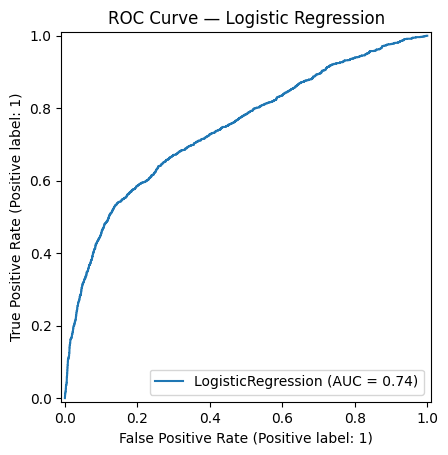

In [44]:
RocCurveDisplay.from_estimator(log_model,X_Test,Y_Test)
plt.title("ROC Curve — Logistic Regression")
plt.show()

In [59]:
# Random Forest Classifier
rf_model=RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_Train,Y_Train)
y_pred_rf=rf_model.predict(X_Test)
y_prob_rf=rf_model.predict_proba(X_Test)[:,1]
roc_rf=roc_auc_score(Y_Test,y_pred_rf)
print("Random Forest Classification ROC-AUC:", round(roc_rf, 4))

Random Forest Classification ROC-AUC: 0.6923


In [60]:
# Random Forest Classification Evaluation
print("Confusion Matrix :\n",confusion_matrix(Y_Test,y_pred_rf))
print("\nClassification_Report:\n",classification_report(Y_Test,y_pred_rf))

Confusion Matrix :
 [[4143  530]
 [ 666  661]]

Classification_Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.55      0.50      0.53      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000



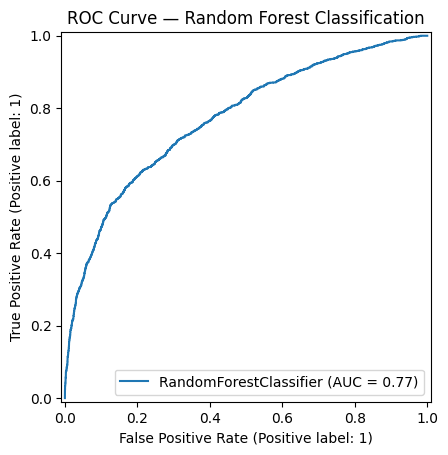

In [61]:
RocCurveDisplay.from_estimator(rf_model,X_Test,Y_Test)
plt.title("ROC Curve — Random Forest Classification")
plt.show()

NaNs in X_train: 0
NaNs in X_test: 0
Unique y_train: [0 1]
Unique y_test: [0 1]
